In [2]:
import pandas as pd
import numpy as np 

import matplotlib.pyplot as plt
import seaborn as sns

from scipy.spatial import ConvexHull
from scipy.spatial.distance import cdist, euclidean

In [3]:
import mesonic

In [4]:
import sc3nb as scn

In [5]:
%matplotlib widget

# Data Preparation

In [6]:
eeg_data = np.loadtxt("../notebooks/data/epileptic-eeg.csv", delimiter=",")
eeg_df = pd.DataFrame(eeg_data)
eeg_df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,0.028222,0.032103,0.061726,0.026151,-0.019168,0.001125,0.084150,0.152345,-0.018833,0.144812,0.023978,-0.060042,-0.059378,-0.142523,-0.081363,-0.003205,0.001900,-0.032508,0.120488
1,0.022063,0.039795,0.072958,0.018535,-0.003891,-0.014948,0.076217,0.129582,-0.002825,0.140455,0.030075,-0.049214,-0.051051,-0.112420,-0.075001,-0.017744,0.004741,-0.031433,0.122046
2,0.008238,0.054645,0.080566,-0.001974,-0.002391,-0.025906,0.066757,0.117620,0.004045,0.128803,0.036379,-0.062148,-0.039406,-0.091644,-0.076569,-0.023592,0.010037,-0.028677,0.113983
3,-0.000430,0.058508,0.072828,-0.002159,0.001742,-0.014803,0.053183,0.087608,-0.004045,0.111465,0.037028,-0.067320,-0.037513,-0.105735,-0.070660,-0.014954,0.011896,-0.038195,0.114507
4,-0.038985,0.060608,0.047122,-0.058543,-0.019638,-0.034496,0.023942,0.038987,-0.017417,0.078132,0.037286,-0.071085,-0.040298,-0.085509,-0.071745,-0.031734,0.011764,-0.050748,0.104357
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12816,0.008137,0.015835,0.030292,0.004232,-0.031876,-0.102639,-0.060007,-0.088014,0.154578,-0.058734,-0.024158,0.008377,0.019477,0.022107,0.052506,-0.066691,0.030541,0.074935,0.070871
12817,-0.002279,0.012823,0.024718,-0.007727,-0.042464,-0.119075,-0.053024,-0.084177,0.142778,-0.069008,-0.024131,0.008295,0.011260,0.010752,0.045623,-0.074747,0.024887,0.063638,0.071442
12818,-0.007978,0.009453,0.016757,-0.016753,-0.051879,-0.125812,-0.056459,-0.082529,0.126470,-0.075869,-0.029486,-0.001356,0.001771,-0.009098,0.034918,-0.077495,0.018433,0.055745,0.073086
12819,-0.011469,-0.003836,0.012690,-0.025660,-0.052121,-0.121801,-0.058094,-0.086325,0.115118,-0.083790,-0.028913,-0.012256,-0.010095,-0.011087,0.024644,-0.084829,0.010719,0.028166,0.066441


In [7]:
penguins_df = sns.load_dataset("penguins")
penguins_df = penguins_df.dropna(subset=["bill_length_mm", "bill_depth_mm", "flipper_length_mm", "body_mass_g", "sex"])
penguins_df = penguins_df.reset_index(drop=True)
penguins_df

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
4,Adelie,Torgersen,39.3,20.6,190.0,3650.0,Male
...,...,...,...,...,...,...,...
328,Gentoo,Biscoe,47.2,13.7,214.0,4925.0,Female
329,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,Female
330,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,Male
331,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,Female


In [8]:
seaice_df = sns.load_dataset("seaice")
seaice_df

,Date,Extent
0,1980-01-01,14.200
1,1980-01-03,14.302
2,1980-01-05,14.414
3,1980-01-07,14.518
4,1980-01-09,14.594
...,...,...
13170,2019-12-27,12.721
13171,2019-12-28,12.712
13172,2019-12-29,12.780
13173,2019-12-30,12.858


<Axes: xlabel='Date'>

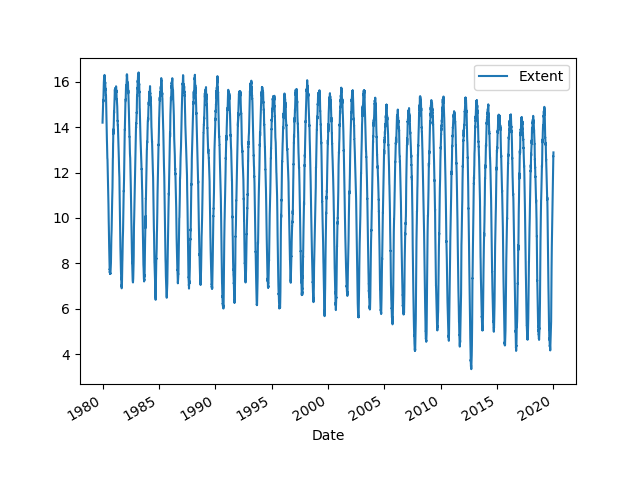

In [9]:
seaice_df.set_index("Date").plot()

# Sonecules

In [10]:
import uuid

In [11]:
context = mesonic.create_context()

<IPython.core.display.Javascript object>

Starting sclang process... [sclang | start reading ]
Done.
Registering OSC /return callback in sclang... Done.
Loading default sc3nb SynthDefs... Done.
Booting SuperCollider Server... 
SuperCollider Server port 57110 already used.
Trying to connect.
Done.


In [12]:
sonecules_default_context = context

In [13]:
uuid.uuid4()

UUID('ac625241-2169-4183-8c9a-a8244a830f61')

In [14]:
pb = context.create_playback()

In [15]:
context.processor is pb.processor

True

In [16]:
class SoneculeFilter:
    
    def __init__(self):
        self.deactivated_sonecules = set()
    
    def __call__(self, event):
        sonecule_id = event.info.get("sonecule_id", None) 
        if sonecule_id is not None and sonecule_id in self.deactivated_sonecules:
            return None
        else:
            return event
    

In [17]:
context.processor.event_filter = SoneculeFilter() 
# TODO this should be a list/set of filters so we don't block custom filters

In [18]:
class Sonecule:
    
    def __init__(self, context=None): 
        if context is None:
            context = sonecules_default_context
        self.context = context
        self._sonecule_id = uuid.uuid4()
        
    # require or better ensure each synth created in a sonecule gets the
    # metadata set to include the sonecule_id so it can be filtere
    
    @property
    def sonecule_id(self):
        return self._sonecule_id
    
    @property
    def active(self, value):
        return self.sonecule_id in context.processor.event_filter.deactivated_sonecules
    
    @active.setter
    def active(self, value):
        assert isinstance(value, bool)
        if value:  # this sonecule should not be part of the timeline
            context.processor.event_filter.deactivated_sonecules.add(self.sonecule_id)
        else:
            context.processor.event_filter.deactivated_sonecules.discard(self.sonecule_id)
    
    def reset(self): # clear this 
        """iterate over timeline and remove events belonging to this Sonecule"""
        # TODO this should be done in mesonic
        ...
    

# Sonification Classes

## Score-based / Timeline Sonifications

* schedule method for score / timeline generation

In [19]:
from sc3nb import linlin, midicps, cpsmidi

In [20]:
s2 = context.synths.create("s2", track=1) 

Question: create Synths in sonecule or outside?
- inside: 
    - we have full control over synth creation
    - some sonecules will rely on specific synths
    - we can better provide sensible defaults
    - requires atleast a small inheritance overwritting synth name string for synth changes, perhaps also needs to redo setup
- outside:
    - user can already set defaults and bounds
    - user can adapt a sonecule quickly without much code
    


In [21]:
s2.metadata.update({"sonecule_id": 1321})

In [22]:
s2.metadata

{'sonecule_id': 1321}

In [23]:
s2.params # param bounds would provide a target mapping bound 

{'freq': Parameter(freq=400.00, default=400.00, bounds=(None, None)),
 'amp': Parameter(amp=0.30, default=0.30, bounds=(None, None)),
 'num': Parameter(num=4.00, default=4.00, bounds=(None, None)),
 'pan': Parameter(pan=0.00, default=0.00, bounds=(None, None)),
 'lg': Parameter(lg=0.10, default=0.10, bounds=(None, None)),
 'gate': Parameter(gate=1.00, default=1.00, bounds=(None, None))}

### standard Discrete PMSon - old

In [24]:
class StandardDiscretePMSon(Sonecule):
    
    def __init__(self, synth_name="s2", context=None):
        super().__init__(context)
        # if instanceof(synth,Synth): 
        self.synth = self.context.synths.create(synth_name, track=1, mutable=False)
        # creation here should add metadata which then is added to each produced event
        
    def schedule(self, df, mapping, at=0, stop_after=0.1, **odfkwargs):  # odfkwargs is a bad name    
        self.reset()
        
        dfkwargs = {"dmin": df.min(), "dmax": df.max()}
        dfkwargs.update(odfkwargs)  # allow overwriting of df
        
        for idx in df.index:
            col, fun, mkwargs = mapping["onset"]
            value = getattr(df, col)[idx]
            data_min, data_max = dfkwargs["dmin"][col], dfkwargs["dmax"][col]  # name?
            onset = fun(value, **mkwargs, dmin=data_min, dmax=data_max)
            with context.at(at+onset, info={"sonecule_id": self.sonecule_id}) as tp:
                for param in [param for param in mapping.keys() if param != "onset"]:
                    col, fun, mkwargs = mapping[param]
                    value = getattr(df, col)[idx]
                    dmin, dmax = dfkwargs["dmin"][col], dfkwargs["dmax"][col] 
                    setattr(self.synth, param, fun(value, **mkwargs, dmin=dmin, dmax=dmax))
                

### standard Continuous PMSon - old

In [25]:
class StandardContinuousPMSon(Sonecule):
    
    def __init__(self, synth_name, context=None):
        super().__init__(context)
        # if instanceof(synth,Synth): 
        self.synth = self.context.synths.create(synth_name, track=1, mutable=True)
        # creation here should add metadata which then is added to each produced event
        
    def schedule(self, df, mapping, at=0, time_after_last=0.1, **odfkwargs):  # odfkwargs is a bad name    
        self.reset()
        
        dfkwargs = {"dmin": df.min(), "dmax": df.max()}  # TODO names for dmin, dmax?
        dfkwargs.update(odfkwargs)  # allow overwriting of df
    
        with context.at(at, info={"sonecule_id": self.sonecule_id}):
            self.synth.start()
            
        for idx in df.index:
            col, fun, mkwargs = mapping["onset"]
            value = getattr(df, col)[idx]
            data_min, data_max = dfkwargs["dmin"][col], dfkwargs["dmax"][col]
            onset = fun(value, **mkwargs, dmin=data_min, dmax=data_max)
            with context.at(at+onset, info={"sonecule_id": self.sonecule_id}) as tp:
                for param in [param for param in mapping.keys() if param != "onset"]:
                    col, fun, mkwargs = mapping[param]
                    value = getattr(df, col)[idx]
                    dmin, dmax = dfkwargs["dmin"][col], dfkwargs["dmax"][col]
                    value = fun(value, **mkwargs, dmin=dmin, dmax=dmax)
                    setattr(self.synth, param, value)
                
        with context.at(at + onset + time_after_last, info={"sonecule_id": self.sonecule_id}):
            self.synth.stop()



In [26]:
scPMSon = StandardContinuousPMSon("s2")

In [27]:
assert scPMSon.context is sonecules_default_context

In [28]:
context.timeline.reset()

In [29]:
context.timeline

Timeline(is_empty=True)

In [30]:
mapping = {
    "onset": 
        ("flipper_length_mm",
         lambda value, dmin, dmax, y1, y2: linlin(value, dmin, dmax, y1, y2),
         dict(y1=0, y2=5)),
    "freq": 
        ("body_mass_g",
         lambda value, dmin, dmax, y1, y2: midicps(linlin(value, dmin, dmax, y1, y2)),
         dict(y1=48, y2=25)),
    }

scPMSon.schedule(penguins_df, mapping, at=2, time_after_last=2)

In [31]:
context.timeline

Timeline(2-8.474576271186441 (6.474576271186441) #entries=55)

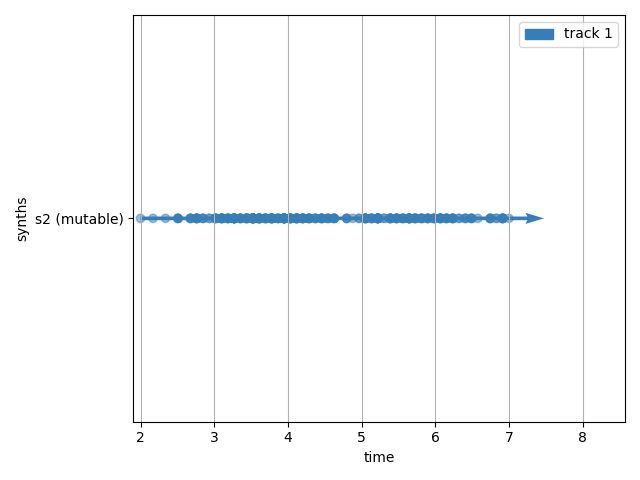

In [32]:
context.timeline.plot()

In [33]:
pb.start(2)

### WIP standardContinuousPMSon - new format - init with Synth Bounds and schedule with mapping_spec, data bounds 

In [36]:
from typing import Optional, Dict, Any

In [37]:
from  mesonic.synth import Synth 

In [38]:
class StandardContinuousPMSon(Sonecule):
    SPECIAL_PARAMETER_SPECS = ["conversion"]
    
    
    def __init__(self, synth: str = "s2", parameter_specs: Optional[Dict[str, Dict[str, Any]]] = None, context=None):
        super().__init__(context)
        if isinstance(synth, Synth):
            assert s2.mutable, "Synth needs to be mutable for continuous Parameter Mapping Sonification"
            self.synth = synth
        else:
            self.synth = self.context.synths.create(synth, track=1)
        if parameter_specs is None:
            parameter_specs = dict()
        
        def _get_conversion(parameter_name):
            try:
                return parameter_specs[parameter_name]["conversion"]
            except KeyError:
                return None
        
        self.conversions = {param: _get_conversion(param) for param in self.synth.params}        
        
        # treat the rest f.e. bounds as synth attributes
        for param, param_spec in parameter_specs.items():
            if param not in self.synth.params:
                raise ValueError(f"{param} is not a Parameter of {self.synth}") 
            else:
                if "bounds" in param_spec:
                    getattr(self.synth, param).bounds = param_spec["bounds"]
                if "default" in param_spec:
                    getattr(self.synth, param)._default = param_spec["default"]
        
        # creation here should add metadata which then is added to each produced event
        self.synth.metadata = self.sonecule_id
        
    def schedule(self, df, mapping, at=0, stop_after=0.1, **odfkwargs):  # odfkwargs is a bad name
        # clear the current events from the timeline
        self.reset()
        
        dfkwargs = {"dmin": df.min(), "dmax": df.max()}  # TODO names for dmin, dmax?
        dfkwargs.update(odfkwargs)  # allow overwriting of df
    
        with context.at(at, info={"sonecule_id": self.sonecule_id}):
            self.synth.start()
        
        # TODO
        
        for idx in df.index:
            col, fun, mkwargs = mapping["onset"]
            value = getattr(df, col)[idx]
            data_min, data_max = dfkwargs["dmin"][col], dfkwargs["dmax"][col]
            onset = fun(value, **mkwargs, dmin=data_min, dmax=data_max)
            with context.at(at+onset, info={"sonecule_id": self.sonecule_id}) as tp:
                for param in [param for param in mapping.keys() if param != "onset"]:
                    col, fun, mkwargs = mapping[param]
                    value = getattr(df, col)[idx]
                    dmin, dmax = dfkwargs["dmin"][col], dfkwargs["dmax"][col] 
                    setattr(self.synth, param, fun(value, **mkwargs, dmin=dmin, dmax=dmax))
                
        with context.at(at + onset + stop_after, info={"sonecule_id": self.sonecule_id}):
            self.synth.stop()


In [39]:
scpmson = StandardContinuousPMSon("s2", {"freq": {"bounds": (50,70), "conversion": midicps}, "amp": {"default": 0.1}})  # bounds are in pre conversion unit - but this is done differently here in the code

In [40]:
scpmson.synth.params

{'freq': Parameter(freq=400.00, default=400.00, bounds=(50, 70)),
 'amp': Parameter(amp=0.10, default=0.10, bounds=(None, None)),
 'num': Parameter(num=4.00, default=4.00, bounds=(None, None)),
 'pan': Parameter(pan=0.00, default=0.00, bounds=(None, None)),
 'lg': Parameter(lg=0.10, default=0.10, bounds=(None, None)),
 'gate': Parameter(gate=1.00, default=1.00, bounds=(None, None))}

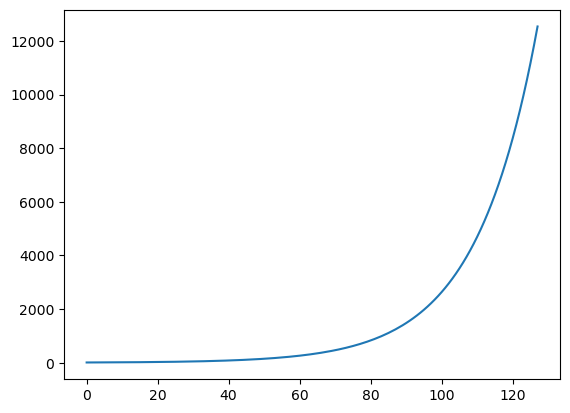

In [41]:
plt.plot([scn.midicps(x) for x in range(128)]);

### Time-variant Oscillator bank mapping

for multivariate time series, pitchmapping on variable nr. of independent oscillators, value -> pitch deviation from a centers, centers are musically equidistant between a minimal and maximal MIDI number. 
 - Special features: change-driven amplitude (difference mapped to amplitude to emphasize changes)
 - Special case: Auditory graph


In [42]:
context.reset()

## Buffer Synthesis Sonifications

Sonifications that are implemented as Synthesis that acts on a Buffer

good for realtime / interactive sonifications

In [36]:
class BufferSynth(Sonecule):
    
    def __init__(self, data, sr, context=None):
        super().__init__(context=context)
        if type(self).synth_name not in self.context.synths.buffer_synthdefs:
            raise NotImplementedError("the selected Context does not offer an {self.synth_name} Synth")
        # self.df = ...
        self.buf = self.context.buffers.from_data(data, sr)
        self.synth = self.context.synths.from_buffer(self.buf, synth_name=type(self).synth_name)
        
    def resampling(self, **kwargs):
        # data = self.buf ---- .data
        # asig = Asig(...)
        # self.buf = self.context.buffer.from_asig(asig)
        ...
        
    def schedule(self, at=0):
        with self.context.at(time=at):
            self.synth.start()
    
    def start(from_t, to_t): # slicing
        ...
    

In [41]:
context.enable_realtime();

In [45]:
%matplotlib qt

### Simple Audification

In [34]:
print(context.synths.buffer_synthdefs["playbuf"])


{ |out=0, bufnum={{BUFNUM}}, rate=1, loop=0, pan=0, amp=0.3 |
    var sig = PlayBuf.ar({{NUM_CHANNELS}}, bufnum,
        rate*BufRateScale.kr(bufnum),
        loop: loop,
        doneAction: Done.freeSelf);
    Out.ar(out, Pan2.ar(sig, pan, amp))
}


In [37]:
class Audification(BufferSynth):
    synth_name = 'playbuf'
    

In [38]:
audification = Audification(data=eeg_data[:,[0,1]], sr=256)

In [39]:
audification.synth.params

{'out': Parameter(out=0.00, default=0.00, bounds=(None, None)),
 'bufnum': Parameter(bufnum=256.00, default=256.00, bounds=(None, None)),
 'rate': Parameter(rate=1.00, default=1.00, bounds=(None, None)),
 'loop': Parameter(loop=0.00, default=0.00, bounds=(None, None)),
 'pan': Parameter(pan=0.00, default=0.00, bounds=(None, None)),
 'amp': Parameter(amp=0.30, default=0.30, bounds=(None, None))}

In [49]:
audification.synth.start(rate=24)

### TimbralSon

* The timbralson uses the channels of the data to modulate the amplitude of a harmonic of the fundamental frequency `f0` for each channel.

In [50]:
context.synths.buffer_synthdefs["timbralson"]= r"""
        { |bufnum={{BUFNUM}}, f0=90, amp=0.1, rate=1 |
            var nch = {{NUM_CHANNELS}};
            var sines = SinOsc.ar(nch.collect{|i| f0*rate*(i+1)});
            var playbufs = PlayBuf.ar(nch, bufnum, BufRateScale.kr(bufnum)*rate, doneAction: 2 ) ;
            Out.ar(0, (sines * playbufs).sum * amp!2 )
        }"""

In [51]:
class TimbralSon(BufferSynth):  
    synth_name = 'timbralson'

# that is possible but the TimbralSon is not really an Audification but also direcly uses
# the buffer with the data in a Ugen graph

In [52]:
timbralson = TimbralSon(eeg_data[14*256:24*256], sr=256)

In [53]:
timbralson.synth.params

{'bufnum': Parameter(bufnum=257.00, default=257.00, bounds=(None, None)),
 'f0': Parameter(f0=90.00, default=90.00, bounds=(None, None)),
 'amp': Parameter(amp=0.10, default=0.10, bounds=(None, None)),
 'rate': Parameter(rate=1.00, default=1.00, bounds=(None, None))}

In [54]:
timbralson.synth.start({"f0": 90, "rate": 0.5})

[sclang | reached EOF ]


The created Synth will offer the Parameters defined above and we can adapt them while the Synth plays.

In [56]:
timbralson.synth.f0 = 70

In [57]:
timbralson.synth.f0 = 100

In [58]:
timbralson.synth.rate = 1

In [59]:
timbralson.synth.stop()

In [ ]:
ctx.timeline.plot()

In [ ]:
ctx.clo

## Sonification as Handler/Callback/Setup

* MBS 
* Event-based?


### Data Sonogram

The `DataSonogram` implements a Data Sonogram

- The model gets a dataset which is plotted in two dimensions.
- When the user clicks into the plot a shock wave (signaled by noise Synth) is created from the nearest data point.



In [61]:
scn.SynthDef("noise", r"""
{ |out=0, freq=2000, rq=0.02, amp=0.3, dur=1, pos=0 |
    Out.ar(out, Pan2.ar(
        BPF.ar(WhiteNoise.ar(10), freq, rq) 
        * Line.kr(1, 0, dur, doneAction: 2).pow(4), pos, amp));
}""").add()

'noise'

In [62]:
class DataSonogram(Sonecule):

    def __init__(self, df, x, y, label, max_duration=1.5, spring_synth="s1", trigger_synth="noise", context=None):
        super().__init__(context=context)
        
        #prepare synths
        self.trigger_synth = self.context.synths.create(trigger_synth, mutable=False)  # TODO make sure the synths have metadata
        self.spring_synth = self.context.synths.create(spring_synth, mutable=False)
        
        # save dataframe
        self.df = df
        self.numeric_df = df.select_dtypes(include=[np.number])
        
        # check if x and y are valid
        allowed_columns = self.numeric_df.columns
        assert x in allowed_columns, f"x must be in {allowed_columns}"
        assert y in allowed_columns, f"y must be in {allowed_columns}"

        # prepare data for model
        self.labels = self.df[label]
        self.unique_labels = self.labels.unique()
        label2id = {label: idx for idx, label in enumerate(self.unique_labels)}
        self.numeric_labels = [label2id[label] for label in self.labels]
        self.xy_data = self.numeric_df[[x,y]].values 
        self.data = self.numeric_df.values

        # get the convex hull of the data
        hull = ConvexHull(self.data)
        hull_data = self.data[hull.vertices,:]
        # get distances of the data points in the hull 
        hull_distances = cdist(hull_data, hull_data, metric='euclidean')
        self.max_distance =  hull_distances.max()
        
        # set model parameter
        self.max_duration = max_duration
        
        # prepare plot
        self.fig = plt.figure(figsize=(5,5))
        self.ax = plt.subplot(111)

        # plot data
        sns.scatterplot(x=x, y=y, hue=label, data=df, ax=self.ax)
        
        # set callback
        def onclick(event):
            if event.inaxes is None: # outside plot area
                return
            if event.button != 1: # ignore other than left click 
                return
            click_xy = np.array([event.xdata, event.ydata])
            self.create_shockwave(click_xy)
        
        self.fig.canvas.mpl_connect('button_press_event', onclick)

    def create_shockwave(self, click_xy):
        self.context.reset()
        
        with self.context.now() as start_time:
            self.trigger_synth.start()
        # find the point that is the nearest to the click location
        center_idx = np.argmin(np.linalg.norm(self.xy_data - click_xy, axis=1))
        center = self.data[center_idx]
        # get the distances from the other points to this point
        distances_to_center = np.linalg.norm(self.data - center, axis=1)
        # get idx sorted by distances
        order_of_points = np.argsort(distances_to_center)
        # for each point create a sound using the spring synth
        for idx in order_of_points:
            distance = distances_to_center[idx]
            nlabel = self.numeric_labels[idx]
            n = len(self.unique_labels)-1
            onset = (distance / self.max_distance) * self.max_duration
            with self.context.at(start_time + onset):
                self.spring_synth.start(
                    freq = 2 * (400 + 100 * nlabel),
                    amp = scn.dbamp(scn.linlin(distance, 0, self.max_distance, -10, -30)),
                    pan = [-1,1][int(self.xy_data[idx, 0]-click_xy[0] > 0)],
                    dur = 0.04,
                    info = {"label": self.labels[idx]},
                )

In [63]:
dsg1 = DataSonogram(penguins_df, x="flipper_length_mm", y="body_mass_g", label="species")

[sclang | reached EOF ]
[sclang | reached EOF ]
